# 一、实验准备

## 1、实验概述

广告作为市场营销的一个组成部分，发挥着不可替代的重要作用。随着经济的发展，广告传播在市场营销中不断影响着营销观念的变化，好的广告可以使企业更好地开发和利用营销资源，可以更好地满足和适应高速发展的经济全球化的需要。因此，科学地，深入地对分析广告投入对销售量的影响，构建销售预测模型极其重要。

## 2、实验目的

通过分析研究，构建更为合理的广告-销售预测模型，对于决策者了解广告对于销售的贡献程度，进行合理的广告投入已达到最大化广告效应的具有一定的指导意义。

## 3、实验建议

（1）掌握数据描述，  
（2）对数据进行简单分析和预处理  
（3）机器学习模型（尤其是线性回归的模型）构建  
（4）参数的简单调整  
（5）以及模型评价，  
（5）数据可视化等能力；

# 二、实验步骤

## 1、数据集描述

本数据集共有200条数据，4个变量，其中TV, Radio, Newpaper为解释变量，被解释变量为Sales.

## 2、载入数据

查看当前工作路径

In [1]:
%pwd

'C:\\Users\\zlw\\Documents\\SUFE\\上财课程\\大数据商业实战数据挖掘\\大数据AI实战训练营\\大数据商业实战\\Python实战\\scikit-learn\\action\\regression'

python开发中经常遇到报错的情况，但是warning通常并不影响程序的运行，而且有时特别讨厌，我们采用如下代码控制警告错误的输出。

In [2]:
import warnings
warnings.filterwarnings('ignore')

通过pandas导入数据，导入数据之后，通过describe()方法，进行数据的基本查看：

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
advertise = pd.read_csv('advertise.csv')

In [5]:
print(type(advertise))
advertise.tail()


<class 'pandas.core.frame.DataFrame'>


,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [12]:
advertise.size

800

In [4]:
advertise.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
advertise.shape

(200, 4)

## 3、数据观察

### 3.1 数据特征查看

In [8]:
advertise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


从上图的结果我们可以看出，数据总共有200行，4列。
在数据科学领域中，一般称事物的属性为字段，4个字段中都有200个非空的float64类型的数值，即没有空值。

查看变量df中各个字段的计数、平均值、标准差、最小值、下四分位数、中位数、上四分位、最大值，代码如下：

In [9]:
advertise.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


### 3.2 绘制散点图观察数据

使用matplotlib库画图时，导入画板对象plt和防止中文出现乱码，一定要先运行下面3行代码

In [10]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

在编程当中，相同运行逻辑的代码出现2次是可以容忍的，但是出现3次及以上需要对此部分代码进行封装成函数。  
对绘制散点图的代码封装如下：

In [11]:
def drawScatter(x, y, xlabel):
    plt.scatter(x, y)
    plt.title('%s与sales散点图' %xlabel)
    plt.xlabel(xlabel)
    plt.ylabel('sales')
    plt.yticks(range(0,30,5))
    plt.grid()
    plt.show()

#### 3.2.1 字段TV分析

TV表示电视广告投入，把它作为x轴的数值。绘制一样电视广告投入与销量的散点图，代码如下：

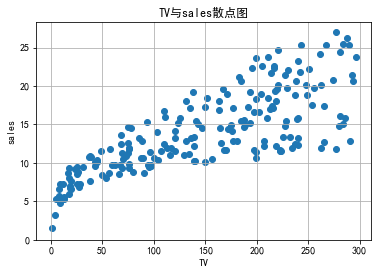

In [12]:
drawScatter(advertise['TV'],advertise['Sales'], 'TV')

#### 3.2.2 字段Radio分析

Radio表示广播广告投入，把它作为x轴的数值。绘制一样电视广告投入与销量的散点图，代码如下：

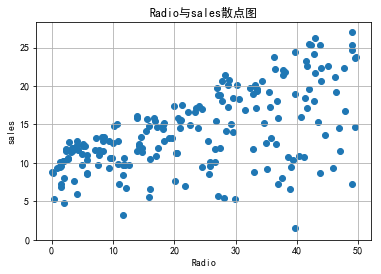

In [13]:
drawScatter(advertise['Radio'],advertise['Sales'], 'Radio')

#### 3.2.3 字段Newspaper分析

Newspaper表示广播广告投入，把它作为x轴的数值。绘制一样电视广告投入与销量的散点图，代码如下：

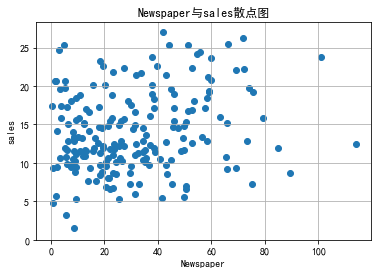

In [14]:
drawScatter(advertise['Newspaper'],advertise['Sales'], 'Newspaper')

## 4、建立模型

### 4.1 构建数据集

将200个样本3个特征组成的矩阵赋值给变量X，变量X为大写字母的原因是数学中表示矩阵使用大写字母。
将200个样本1个预测目标值组成的矩阵赋值给变量y。 构建数据集的代码如下：

In [17]:
X = advertise[["TV","Radio"]]
y = advertise["Sales"]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=0.3)

### 4.2 构建回归模型

&emsp;&emsp;python中常用statsmodels、sklearn建立回归模型。  
&emsp;&emsp;本实验从statsmodels建立回归模型，并进行详细讲解。

&emsp;&emsp;Statsmodels 是 Python 中一个强大的统计分析包，包含了回归分析、时间序列分析、假设检
验等等的功能。Statsmodels 在计量的简便性上是远远不及 Stata 等软件的，但它的优点在于可以与 Python 的其他的任务（如 NumPy、Pandas）有效结合，提高工作效率。在本文中，我们重点介绍最回归分析中最常用的 OLS（ordinary least square）功能。

（1）导入需要的packages

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

（2）添加常数项。原因在于模型设定不包含截距。代码如下

In [19]:
X = sm.add_constant(X)

（3）划分数据集

训练集，测试集拆分：X_train，y_train：得到的训练数据。X_test， y_test：得到的测试数据。random_state：随机数

（4）建立模型

In [19]:
lm_model = sm.OLS(y_train,X_train)

（5）拟合数据

In [20]:
results = lm_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     526.9
Date:                Thu, 11 Apr 2019   Prob (F-statistic):           4.66e-65
Time:                        13:58:56   Log-Likelihood:                -280.17
No. Observations:                 140   AIC:                             566.3
Df Residuals:                     137   BIC:                             575.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9648      0.370      8.003      0.000       2.232       3.697
TV             0.0470      0.002     26.578      0.000       0.043       0.050
Radio          0.1777      0.010     17.651      0.000       0.158       0.198
==============================================================================
Omnibus:                       39.117   Durbin-Watson:                   2.101
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.330
Skew:                          -1.247   Prob(JB):                     4.39e-17
Kurtosis:                       5.587   Cond. No.                         407.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(6)预测

In [21]:
beta = results.params
y_predict = np.dot(X_test,beta)

（5）模型评价

1、拟合优度检验

拟合优度（Goodness of Fit）是指回归直线对观测值的拟合程度。度量拟合优度的统计量是可决系数（亦称确定系数）R²。R²最大值为1。R²的值越接近1，说明回归直线对观测值的拟合程度越好；反之，R²的值越小，说明回归直线对观测值的拟合程度越差。

In [25]:
results.rsquared

0.8850053786777522

在多元线性回归中， R2R2 会随着自变量的个数的增加而越来越接近于1。因此需要考虑自变量个数的影响。通常用调整的 R2R2 ，这也使得调整R方永远小于R方

In [47]:
results.rsquared_adj

0.8824687326191732

从调整的$R^2$来看，拟合优度较高

2、系数检验

从上表中，我们可以较为清晰的看到模型的回归参数以及系数显著性检验的p值，可以看出变量Newspaper不显著。说明解释变量Newspaper对销售量没有显著影响。

In [48]:
results.params

const        2.937216
TV           0.046952
Radio        0.176586
Newspaper    0.001851
dtype: float64

In [49]:
results.pvalues

const        6.008665e-12
TV           1.955223e-55
Radio        5.406950e-33
Newspaper    8.134656e-01
dtype: float64

In [50]:
results.pvalues < 0.05

const         True
TV            True
Radio         True
Newspaper    False
dtype: bool

（3）预测评价

In [22]:
#MSE
from sklearn.metrics import mean_squared_error
mse_train = results.mse_total
mse_test = mean_squared_error(y_test,y_predict)
print("训练集MSE:%3.4f"%mse_train)
print("测试集MSE:%3.4f"%mse_test)

训练集MSE:28.0549
测试集MSE:1.9147


In [23]:
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
print("训练集RMSE:%3.4f"%rmse_train)
print("测试集RMSE:%3.4f"%rmse_test)

训练集RMSE:5.2967
测试集RMSE:1.3837


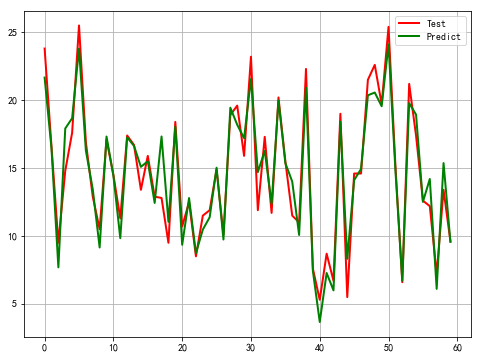

In [76]:
t = np.arange(len(y_test))
fig, ax = plt.subplots(figsize=(8,6))
ax.plot( t,y_test, "r-", linewidth=2, label='Test')
ax.plot( t,y_predict,'g-',linewidth=2, label='Predict')
ax.legend(loc='upper right')
ax.grid()